### AUTHOR : Midhun Kesavan Raj


----
## **Overview**


The dataset I am using here is about the RMS Titanic known as the unsinkable ship and was the largest, most luxurious passenger ship of its time. Sadly, the British ocean liner sank on April 15, 1912, killing over 1500 people while just 705 survived. 
 The dataset includes information about the passengers who had travelled in the Titanic
 **PassengerId: ID of the passenger

 Survived: Survival (0 = No; 1 = Yes)

 Pclass: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

 Name: Name of the passenger

 Sex: Sex of the passenger

 Age: age of primary policyholder

 SibSp: Number of siblings/spouses aboard

 Parch: Number of parents/children aboard

 Ticket: Ticknet number of the passenger

 Fare: Passenger fare (British pound)

 Cabin: The cabin passengers were provided to stay within the ship
 Embarked: Port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
 
  ****
 
 The dataset is available in below link
 https://www.kaggle.com/prkukunoor/TitanicDataset

Here, I am building a Logistic Regression and SVM (with different Kernels) models for classification purpose to meet our objectives.

-----
## Objective:
 1. To determine if there is a relationship between attributes and the survival rate.
 2. Prove (or disprove) that the passengers who travelled in class 1 had a high survival rate than those who didn't?

#### The key questions that we would be asking are:
 1. What sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).¶
 2. How valid is the model we have built?
 3. What can we do to improve the model?

----
## Importing the Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

## Load the data

In [ ]:
df = pd.read_csv('/content/titanic_data.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#shape of the data
df.shape

(891, 12)

###### Titanic dataset consists of 891 rows and 12 columns.

In [ ]:
# basic information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


###### The dataset consists of 12 columns where the second column 'Survived' is our dependent variable.
###### Different types of variable in the dataset are:
###### Categorical varibles - Name, Sex, Ticket, Cabin, and Embarked
###### Quantitative variables -PassengerId, Pclass, Age, SibSp, Parch, Fare and Survived. Among these quantitative variables, Age and Fare are continuous variables.

## Descriptive Statistics

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


###### df.describe() provides the descriptive statistics of all the numerical values of the dataset.
###### Above we can see that 38% out of the training-set survived the Titanic. 
###### We can also see that the passenger ages range from 0.4 to 80. 
###### On top of that we can already detect some features, that contain missing values, like the ‘Age’ feature.

## Data Cleaning

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

###### We see that "Age" and "Cabin" has a lot of missing values. We can replace the null values in the 'Age' column with its median.

In [ ]:
# Replacing the null values in the 'Age' with its median value
df.Age.fillna(df.Age.median(),inplace=True)

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# Replacing the null values in the 'Cabin' with its mode value
df.Cabin.fillna(df.Cabin.mode()[0],inplace=True)
# Replacing the null values in the 'Embarked' with its mode value
df.Embarked.fillna(df.Embarked.mode()[0],inplace=True)

In [ ]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

###### There are no null values in the dataset.

In [ ]:
#checking datatypes
print(df.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


----
## Exploratory Data Analysis

## Univariate Analysis (Central Tendency, Dispersion)

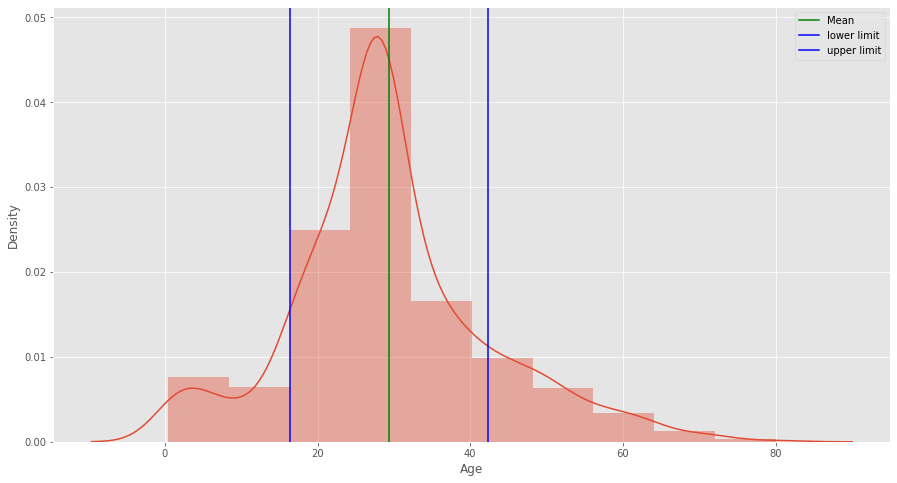

In [ ]:
plt.figure(figsize=(15,8))
plt.style.use('ggplot')
mean = df['Age'].mean()
one_dev = df['Age'].std()

sns.distplot(df['Age'], bins=10, kde=True)

plt.axvline(mean, color='green', label='Mean')
plt.axvline(mean-one_dev, color='blue', label='lower limit')
plt.axvline(mean+one_dev, color='blue', label='upper limit')

plt.legend()

###### The green vertical line tells that mean of the Age is around 30 and the two blue vertical lines are 1 standard deviation away from the mean.

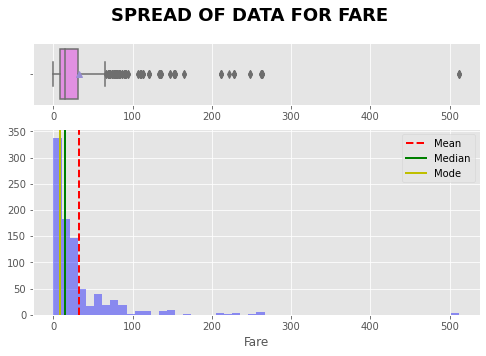

In [ ]:
# A combined graph for univariate analysis of continous variable to check spread, central tendency , dispersion and outliers  
Name=df['Fare'].name.upper()
fig,(ax_box,ax_dis)  =plt.subplots(2,1,gridspec_kw = {"height_ratios": (.25, .75)},figsize=(8, 5))
mean=df['Fare'].mean()
median=df['Fare'].median()
mode=df['Fare'].mode().tolist()[0]
fig.suptitle("SPREAD OF DATA FOR "+ Name  , fontsize=18, fontweight='bold')
sns.boxplot(x=df['Fare'],showmeans=True, orient='h',color="violet",ax=ax_box)
ax_box.set(xlabel='')
sns.distplot(df['Fare'],kde=False,color='blue',ax=ax_dis)
ax_dis.axvline(mean, color='r', linestyle='--',linewidth=2)
ax_dis.axvline(median, color='g', linestyle='-',linewidth=2)
ax_dis.axvline(mode, color='y', linestyle='-',linewidth=2)
plt.legend({'Mean':mean,'Median':median,'Mode':mode})

###### Fares distribution is unimodal and is skewed to right.The average fare of the ticket is around 30 and highest fare is 510. There are lot of outliers at upper end.

## Count plot

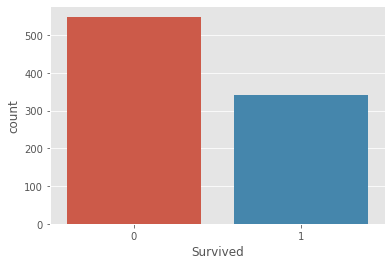

In [ ]:
sns.countplot(df['Survived'])

###### From the above plot, we can see that more than 50% of passengers who travelled in Titanic did not survive the disaster.

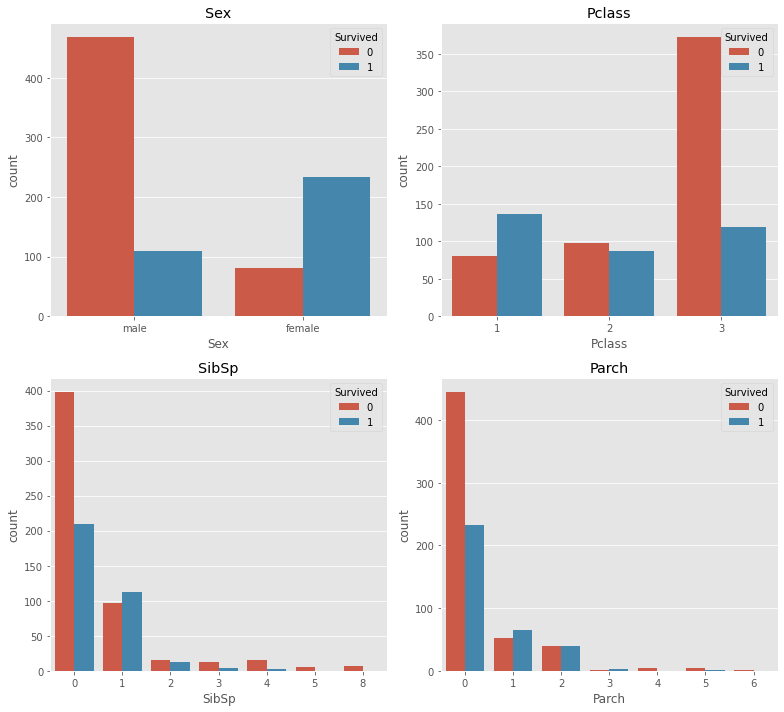

In [ ]:
cols = ['Sex', 'Pclass','SibSp','Parch']
n_rows = 2
n_cols = 2
# The subplot grid and the figure size of each graph
fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*5.5,n_rows*5))

for r in range(0,n_rows):
    for c in range(0,n_cols):  
        
        i = r*n_cols+ c #index to go through the number of columns       
        ax = axs[r][c] #Show where to position each subplot
        sns.countplot(df[cols[i]], hue=df["Survived"], ax=ax)
        ax.set_title(cols[i])
        ax.legend(title="Survived", loc='upper right') 
        
plt.tight_layout() 

###### From the above plot, we can deduce that most of the passengers who did not survive the disaster had :
###### a.) Belonged to the gender 'Male'
###### b.) Travelled in pclass 3
###### c.) No siblings or spouse
###### d.) No parents or children

In [ ]:
#survival rate by sex
y = df.groupby('Sex')[['Survived']].mean().reset_index()
y

,Sex,Survived
0,female,0.742038
1,male,0.188908


###### 74.2% of females in the dataset survived and only 18.89% of males survived. This indicates a very low survival chance for males.

In [ ]:
#survival rate by sex and class
df.pivot_table('Survived', index='Sex', columns='Pclass')

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


###### From the pivot table, we see that females in first class had a high survival rate of about 96.8%, meaning the majority of them survived. Males in third class had the lowest survival rate at about 13.54%, meaning the majority of them did not survive.

## Bar Plot

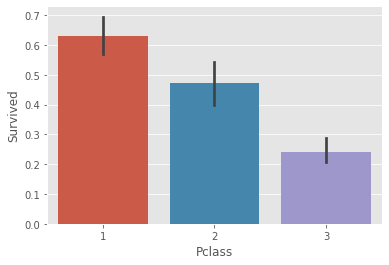

In [ ]:
#Plot the survival rate of each class.
sns.barplot(x='Pclass', y='Survived', data=df)

######  Passengers in the first class had  a high survival rate of around 62% whereas the third class had the lowest survival rate of 22%. This means that more than half of the passengers who travelled in first class survived the disaster.

## Scatter plot

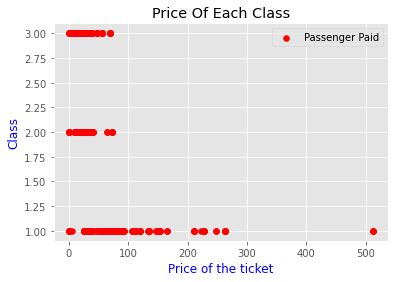

In [ ]:
#Plot the Prices Paid Of Each Class
plt.scatter(df['Fare'], df['Pclass'],  color = 'red', label='Passenger Paid')
plt.ylabel('Class', color='b')
plt.xlabel('Price of the ticket', color='b')
plt.title('Price Of Each Class')
plt.legend()
plt.show()

###### From the above scatter plot, we see that the passengers who paid more than 100 pounds were allowed to travel in First class.

## Box Plot

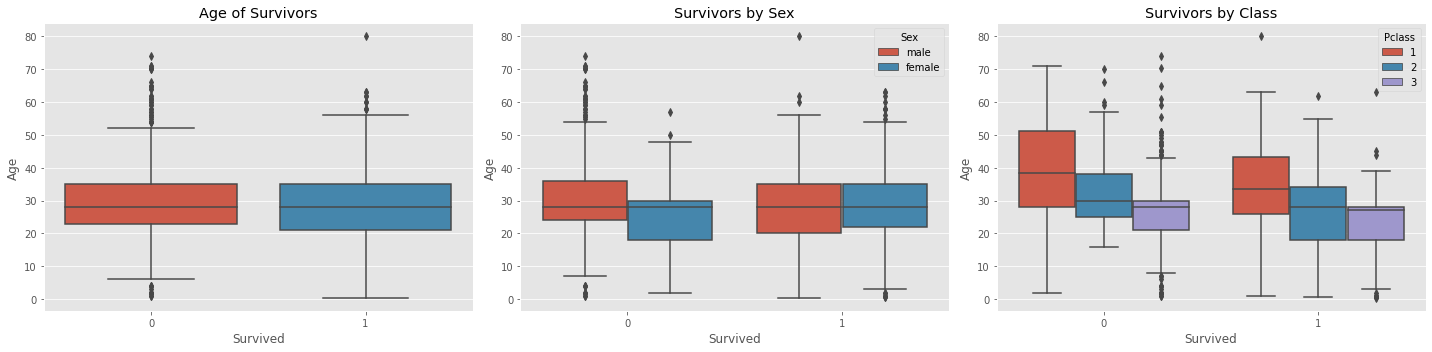

In [ ]:
fig, axx = plt.subplots(1, 3, figsize=(20,5))
axx[0].set_title('Age of Survivors')
sns.boxplot(x='Survived', y='Age', data=df, ax=axx[0])
axx[1].set_title('Survivors by Sex')
sns.boxplot(x='Survived', y='Age', hue='Sex', data=df, ax=axx[1])
axx[2].set_title('Survivors by Class')
sns.boxplot(x='Survived', y='Age', hue='Pclass', data=df, ax=axx[2])
plt.tight_layout()

###### We can deduce from the plot that those who survived were a little bit younger than those who died. Also, we can see that the passenegers in the first class were older than the rest and passengers in third class were younger. 

## Density Plot


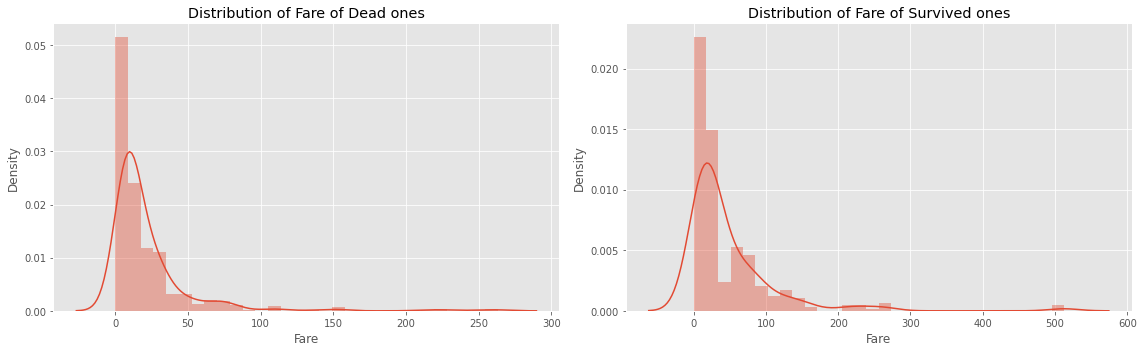

In [ ]:
fig, axx = plt.subplots(1, 2, figsize=(16,5))
axx[0].set_title('Distribution of Fare of Dead ones')
sns.distplot(a=df[df['Survived']==0]['Fare'], ax=axx[0], bins=30)
axx[1].set_title('Distribution of Fare of Survived ones')
sns.distplot(a=df[df['Survived']==1]['Fare'], ax=axx[1], bins=30)
plt.tight_layout()

###### From the above plot, we can see that the fare of those who survived where higher.

## Statistical Analysis (Hypothesis Testing)

## 1.Prove (or disprove) that the passengers who travelled in class 1 had a high survival rate than those who didn't?

### Step 1: Define null and alternate hypothesis
#### H0:μ1=μ2  The passengers who travelled in class 1 did not have a high survival rate than those travelled in class 3
#### Ha:μ1!=μ2  The passengers who travelled in class 1 had a high survival rate than those travelled in class 3

### Step 2: Decide the significance level. If P values is less, then alpha reject the null hypothesis.
#### α = 0.05

### Step 3: Identify the test
#### Since this is a two tail test, we first calculate the z score and then the p value from the z score.

### Step 4: Calculate the z-score and p-value

In [ ]:
First_Class_Sample = np.array([np.mean(df[df["Pclass"]==1].sample(20)["Survived"].values) for i in range(100)])
third_Class_Sample = np.array([np.mean(df[df["Pclass"]==3].sample(20)["Survived"].values) for i in range(100)])

######  The central limit theorem says that each point in the sample should be a mean of a smaller sample. That’s why in the code above I’m taking 100 samples where each of these samples is the mean of 20 points (each point is just either 0 or 1 which refers to the survival and that’s why taking their mean should provide the survival rate).

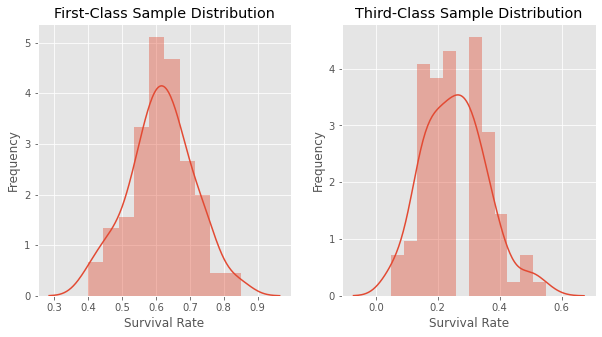

In [ ]:
plt.subplots(1, 2, figsize = (10, 5))
plt.subplot(1,2, 1)
sns.distplot(First_Class_Sample)
plt.title("First-Class Sample Distribution")
plt.xlabel("Survival Rate")
plt.ylabel("Frequency")
plt.subplot(1, 2, 2)
sns.distplot(third_Class_Sample)
plt.title("Third-Class Sample Distribution")
plt.xlabel("Survival Rate")
plt.ylabel("Frequency")
plt.show()

###### According to the central limit theorem, the two sample populations should be approximately normally distributed and the same can be confirmed from the above plot.

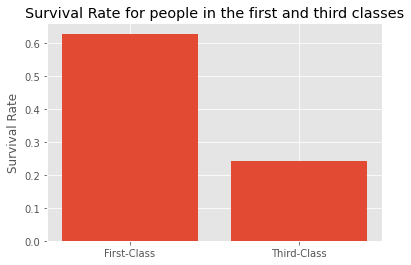

In [ ]:
x = ["First-Class", "Third-Class"]
y = [np.mean(df["Survived"][df["Pclass"]==1]), np.mean(df["Survived"][df["Pclass"]==3])]
plt.bar(x, y)
plt.ylabel("Survival Rate")
plt.title("Survival Rate for people in the first and third classes")
plt.show()

###### From the above plot also, we can say that the passengers who travelled in passenger class 1 had high survival rate of around 65% than those who travelled in passenger class 3.
###### However, this conclusion would be invalid (or let’s say rushed) for two reasons:
###### Firstly, the data that we have is just a sample. We are not sure if that sample is random, independent, unbiased, or even representative of the entire population of the people who were on the titanic. We are using this sample data because it’s all we have.
###### Secondly, this data has been collected by humans, so it is very prone to human error, bias, or randomness that happens in the data collection process.

**Z-Test**

In [ ]:
# Calculating the z score
effect = np.mean(First_Class_Sample) - np.mean(third_Class_Sample)
sigma_first = np.std(First_Class_Sample)
sigma_third = np.std(third_Class_Sample)
sigma_difference = np.sqrt((sigma_first**2)/len(First_Class_Sample)  +  (sigma_third**2)/len(third_Class_Sample))
z_score = effect / sigma_difference
z_score

25.712209522407875

In [ ]:
# Calculating the p-value
alpha=0.05

p_value = stats.norm.sf(abs(z_score))*2
print("Pvalue ={}".format(p_value))

Pvalue =8.536064688401915e-146


In [ ]:
if p_value < alpha :
    print("Conclusion:\nSince P value {} is less than alpha {}". format (p_value,alpha) )
    print("Reject Null Hypothesis that the passengers who travelled in class 1 did not have a high survival rate than those travelled in class 3")
    
else:
    print("Conclusion:Since P value {} is greater than alpha {}". format (p_value,alpha))
    print("Failed to Reject Null Hypothesis that that the passengers who travelled in class 1 did not have a high survival rate than those travelled in class 3")

Conclusion:
Since P value 8.536064688401915e-146 is less than alpha 0.05
Reject Null Hypothesis that the passengers who travelled in class 1 did not have a high survival rate than those travelled in class 3


###### If we assume that the null hypothesis is true, then the probability of observing that effect by random is 2.73e-25% which is an extremely small probability that makes us comfortable in rejecting the Null hypothesis.
###### Even though, we couldn't make any relation between these two features, we can just generally say that rich people who travelled in had a better chance of survival at the ship.

## Data Preprocessing

In [ ]:
# Checking the unique values for 'Sex'
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [ ]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

### Label Encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
df['Sex']= le.fit_transform(df['Sex'])
df['Sex']= le.fit_transform(df['Sex'])
df['Embarked']= le.fit_transform(df['Embarked'])

###### The categorical data in columns 'Sex' and 'Embarked' has been converted to numerical data using Label encoder.

In [ ]:
print("The unique values of column 'Sex' are: ",df['Sex'].unique())
print("The unique values of column 'Embarked' are: ",df['Embarked'].unique())

The unique values of column 'Sex' are:  [1 0]
The unique values of column 'Embarked' are:  [2 0 1]


-----
## Preparing the data for training the model

In [ ]:
X = df.drop(['Survived','PassengerId','Name','Ticket','Cabin'],axis=1)
Y = df['Survived']
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

### Splitting the data into Training set and Testing set

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size = 0.2)
print("Shape of x_train is: ",x_train.shape)
print("Shape of x_test is: ",x_test.shape)
print("Shape of y_train is: ",y_train.shape)
print("Shape of y_test is: ",y_test.shape)

Shape of x_train is:  (712, 7)
Shape of x_test is:  (179, 7)
Shape of y_train is:  (712,)
Shape of y_test is:  (179,)


## Scaling the data

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## Building Logistic regression model

In [ ]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_predict = log_model.predict(x_test)
y_predict

array([1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1])

In [ ]:
acc_log = log_model.score(x_test,y_test)
acc_log

0.7821229050279329

## Building SVM model

### 1) RBF Kernel

In [ ]:
from sklearn.svm import SVC
svc_rbf = SVC(kernel = 'rbf')
svc_rbf.fit(x_train, y_train )

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

**Predicting the value**

In [ ]:
y_predict = svc_rbf.predict(x_test)
y_predict

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1])

In [ ]:
#accuracy of the model
acc_rbf = svc_rbf.score(x_test, y_test )
acc_rbf

0.7821229050279329

###### The accuracy of the model is 83.24%

### 2) Linear Kernel

In [ ]:
svc_linear = SVC(kernel = 'linear')
svc_linear.fit(x_train, y_train )

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

**Predicting the value**

In [ ]:
y_predict = svc_linear.predict(x_test)
y_predict

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1])

In [ ]:
#accuracy of the model
acc_linear = svc_linear.score(x_test, y_test )
acc_linear

0.770949720670391

###### The accuracy of the model is 93.33%

### 3) Polynomial Kernel:

In [ ]:
svc_poly = SVC(kernel = 'poly',degree = 2)
svc_poly.fit(x_train, y_train )

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
#predicting the value
y_predict = svc_poly.predict(x_test)
y_predict

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1])

In [ ]:
#accuracy of the model
acc_poly = svc_poly.score(x_test, y_test )
acc_poly

0.770949720670391

### 4) Sigmoid Kernel:

In [ ]:
svc_sigmoid = SVC(kernel = 'sigmoid')
svc_sigmoid.fit(x_train, y_train )

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
#predicting the value
y_predict = svc_sigmoid.predict(x_test)
y_predict

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1])

In [ ]:
#accuracy of the model
acc_sigmoid = svc_sigmoid.score(x_test, y_test )
acc_sigmoid

0.6815642458100558

## Comparison of different models

In [ ]:
models = [('Linear Kernel',acc_linear),
          ('Polynomial Kernel',acc_poly),
          ('RBF Kernel',acc_rbf),
          ('Sigmoid Kernel',acc_sigmoid),
          ('Logistic Regression',acc_log)  
         ]

In [ ]:
prediction_table = pd.DataFrame(data = models, columns=['Model', 'Accuracy'])
prediction_table

,Model,Accuracy
0,Linear Kernel,0.770950
1,Polynomial Kernel,0.770950
2,RBF Kernel,0.782123
3,Sigmoid Kernel,0.681564
4,Logistic Regression,0.782123


###### The SVM model with RBF kernel has the high accuracy score of 77.65% among other models.

## Performing Grid search technique to find the best parameter

In [ ]:
svm_model= SVC()
tuned_parameters = [{
  'C': [0.5,1,10,100] , 'kernel': ['linear']},
  {'C': [0.5,1,10,100] , 'gamma': [0.001,0.0001,0.01,0.02,0.03,0.04,0.05], 'kernel': ['rbf']},
  {'degree': [2,3,4] ,'gamma':[0.001,0.00010,.01,0.02,0.03,0.04,0.05], 'C':[0.5,1,10,100] , 'kernel':['poly']
                   }]

In [ ]:
from sklearn.model_selection import GridSearchCV
model_svm = GridSearchCV(svm_model, tuned_parameters,cv=10,scoring='accuracy')

In [ ]:
model_svm.fit(x_train, y_train)
print(model_svm.best_score_)

0.8370305164319249


In [ ]:
print(model_svm.best_params_)

{'C': 10, 'gamma': 0.05, 'kernel': 'rbf'}


##  Final SVM model

In [ ]:
from sklearn.metrics import accuracy_score
model = SVC(kernel = 'rbf', C= 10 , gamma = 0.05)
model.fit(x_train, y_train )
y_predict = model.predict(x_test)
accuracy_score(y_predict,y_test)

0.7988826815642458

###### The accuracy of the SVM with RBF kernemodel is 78.21%

## Evaluating the model
### Classification report 

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.79      0.86      0.83        99
           1       0.81      0.72      0.76        80

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



**Inferences from the above report:**
###### Recall specifies how much we predicted correctly. The recall value for class 0 is 0.80, and for class 1 is 0.76
###### Precision specifies out of all the correct predictions, how many are actually correct. The precison value for class 0 is 0.82, and for class 1 is 0.73
###### Higher the F1 score the better with 0.81 for class 0, and 0.74 for class 1.

## Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_test,y_predict)
confusionMatrix

array([[85, 14],
       [22, 58]])

Text(69.0, 0.5, 'Truth')

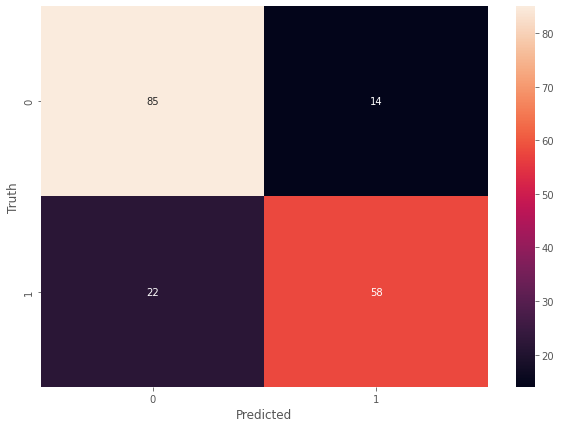

In [ ]:
plt.figure(figsize = (10,7))
sns.heatmap(confusionMatrix, annot = True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

###### In the confusion matrix, we see that of the 105 passengers who did not survive, 84 (80%) were correctly classified. And of the 74 passengers who survived, 56 (75.68%) were correctly classified.  

## Hypothesis Testing

### Null Hypothesis (Ho): Both the models perform same on the dataset
### Alternate Hypothesis (Ha): Both the models does not perform same on the dataset

In [ ]:
from mlxtend.evaluate import paired_ttest_5x2cv
t_statistic,pvalue = paired_ttest_5x2cv(estimator1 = LogisticRegression(),
                                        estimator2 = SVC(kernel = 'rbf', C= 100 , gamma = 0.02),
                                        X=X, 
                                        y=Y,
                                        scoring ='accuracy',
                                        random_seed=1
                                       )
print('P-value is: {:.3f}'.format(pvalue))
print('T statistic is: {:.3f}'.format(t_statistic))

P-value is: 0.021
T statistic is: 3.306


In [ ]:
# interpret the result
if pvalue <= 0.05:
    print('Since pvalue<0.05, we can reject the null-hypothesis that both models perform equally well on this dataset.We may conclude that two algorithms are significantly different.')
else:
    print('Since pvaluep>0.05, we cannot reject the null hypothesis and may conclude that the performance of the two algorithms is not significantly different.')

Since pvalue<0.05, we can reject the null-hypothesis that both models perform equally well on this dataset.We may conclude that two algorithms are significantly different.


######  Thus, the SVM model with RBF Kernel perform better than the Logistic Regression Model with an accuracy of 78.21% 

## Testing the Model

### So given the input observations of a passenger below, can you predict if the passenger will survive?

### Passenger 1

In [ ]:
import random 
random.seed(7887)
random_ind = random.randint(0,len(df))

survival = df.drop(['Survived','PassengerId','Name','Ticket','Cabin'], axis=1).iloc[random_ind]

survival

Pclass       3.0000
Sex          1.0000
Age         36.0000
SibSp        0.0000
Parch        0.0000
Fare         7.4958
Embarked     2.0000
Name: 663, dtype: float64

In [ ]:
x_train.shape

(712, 7)

In [ ]:
survival = survival.values.reshape(1, 7)
scaled_data=scaler.transform(survival)
scaled_data 

array([[ 0.        ,  0.        ,  0.66666667,  0.        ,  0.        ,
        -0.30225457,  0.        ]])

### SVM model with RBF Kernel prediction on this randomly selected data

In [ ]:
svc_rbf.predict(scaled_data)[0]

0

### Actual value of that randomly selected data

In [ ]:
df.iloc[random_ind]['Survived']

0

###### A female passenger traveling in the passenger class 3 did not survive the disaster.

### Passenger 2

In [ ]:
import random 
random.seed(19999)
random_ind = random.randint(0,len(df))

survival = df.drop(['Survived','PassengerId','Name','Ticket','Cabin'], axis=1).iloc[random_ind]

survival

Pclass       2.0
Sex          0.0
Age         18.0
SibSp        0.0
Parch        2.0
Fare        13.0
Embarked     2.0
Name: 417, dtype: float64

In [ ]:
survival = survival.values.reshape(1, 7)
scaled_data=scaler.transform(survival)
scaled_data 

array([[-1.        , -1.        , -0.83333333,  0.        ,  2.        ,
        -0.06402083,  0.        ]])

### SVM model with RBF Kernel prediction on this randomly selected data

In [ ]:
svc_rbf.predict(scaled_data)[0]

1

### Actual value of that randomly selected data

In [ ]:
df.iloc[random_ind]['Survived']

1

###### A male passenger traveling with a parent in passenger class 2 survived the disaster.

----
## Conclusion
#### We have implemented the SVM model (RBF kernel) for classification with python. 
#### From the above model, we can infer the below conclusions:
#### 1. Among the travellers, female and the passengers from pclass1 (passenger class 1) and pclass2 (passenger class 2) had a better chance of survival.
#### 2. Considering the group of men and children, men had the least survival chance, but a chid of gender 'Male' had a higher probability of surviving.